In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns;sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/fangcheng/sklearn/项目六：信用卡欺诈检测/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df['Amount'] = StandardScaler().fit_transform(df['Aumont'])

KeyError: 'Aumont'

In [6]:
df.shape

(284807, 31)

Text(0, 0.5, 'Frequency')

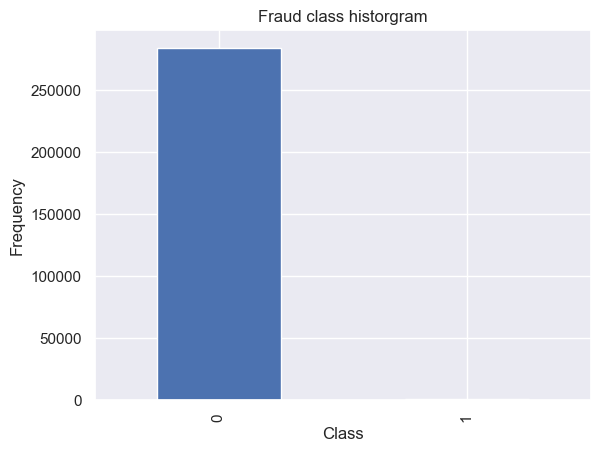

In [7]:
df['Class'].value_counts(ascending=False).plot(kind='bar')
plt.title('Fraud class historgram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
fraud_percent = 100 * (df['Class'] == 1).sum()/len(df)
fraud_percent

0.1727485630620034

### 由上述的统计结果可以看出，我们的这份数据集是非常不均衡的，异常数据的比例只占到总数0.17%。所以对于该数据集，我们采用两种方法处理，下采样和过采样。

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 下采样方案

In [11]:
# 提取特征
X = df.loc[:,df.columns != 'Class']
# 提取标签
y = df.loc[:,df.columns == 'Class']
print(X.shape,y.shape)

(284807, 30) (284807, 1)


In [12]:
# 得到异常样本的个数
number_fraud_sample = len(df[df['Class'] == 1])

# 得到异常样本的索引
fraud_index = np.array(df[df['Class'] == 1].index)
# 得到正常样本的索引
normal_index = np.array(df[df['Class'] == 0].index)
# 在正常样本中，催随机采样出指定的样本，并提取索引
random_normal_index = np.random.choice(normal_index,number_fraud_sample,replace=False)
random_normal_index=np.array(random_normal_index)
# 下采样所有样本的索引
undersample_index = np.hstack((random_normal_index,fraud_index))

In [13]:
undersample_index.shape

(984,)

In [14]:
#下采样的数据点
undersample_X = X.loc[undersample_index,:]
undersample_y = y.loc[undersample_index,:]

print('下采样数据的数量：',len(undersample_index))
print('正样本的比例: ',len(random_normal_index)/len(undersample_X))
print('负样本的比例: ',number_fraud_sample/len(undersample_X))

下采样数据的数量： 984
正样本的比例:  0.5
负样本的比例:  0.5


#### 对数据集进行划分

In [15]:
from sklearn.model_selection import train_test_split,KFold

# 对整个数据集划分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print('训练集的数量:',len(X_train))
print('测试集的数量:',len(X_test))
print('训练及的总数:',len(X_train)+len(X_test))

# 对下采样数据集进行划分
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(undersample_X,undersample_y,test_size = 0.3,random_state = 0)
print('下采样训练集的数量: ',len(X_train_undersample))
print('下采样测试集的数量: ',len(X_test_undersample))
print('下采样训练集的总量: ',len(X_train_undersample)+len(X_test_undersample))

训练集的数量: 199364
测试集的数量: 85443
训练及的总数: 284807
下采样训练集的数量:  688
下采样测试集的数量:  296
下采样训练集的总量:  984


### 逻辑回归模型建立

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,roc_auc_score

In [17]:
def printing_Kfold_scores(x_train_data,y_train_data):
    kf = KFold(n_splits = 5)
    #定义不同的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    #创建一个用于展示结果的表格
    results_table = pd.DataFrame(index = range(len(c_param_range)),columns = ['C_parameter','Mean_recall_score'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('------------------------')
        print('正则化惩罚力度: ',c_param)
        print('-------------------------')
        print(' ')
        recall_accs = []
        
        for iteration,indices in enumerate(kf.split(x_train_data),start = 1):
            #指定算法模型，并给定出事参数
            Lr = LogisticRegression(C = c_param,penalty = 'l1',solver='liblinear')
            Lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample = Lr.predict(x_train_data.iloc[indices[1],:])
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values.ravel(),y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration: ',iteration,'召回率 = ',recall_acc)
        #当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean_recall_score'] = np.mean(recall_accs)
        
        j += 1
        print(' ')
        print('平均召回率: ',np.mean(recall_accs))
        print(' ')
    #找最好的参数，哪个位置的recall值最高
    best_c = results_table.iloc[results_table['Mean_recall_score'].astype(np.float32).argmax()]['C_parameter']
    print('------------------------------')
    print('最好的惩罚力度参数: ',best_c)
    print('-------------------------------')
    return best_c

In [18]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

------------------------
正则化惩罚力度:  0.01
-------------------------
 
Iteration:  1 召回率 =  0.9076923076923077
Iteration:  2 召回率 =  0.8153846153846154
Iteration:  3 召回率 =  0.810126582278481
Iteration:  4 召回率 =  0.9206349206349206
Iteration:  5 召回率 =  0.8732394366197183
 
平均召回率:  0.8654155725220086
 
------------------------
正则化惩罚力度:  0.1
-------------------------
 
Iteration:  1 召回率 =  0.9230769230769231
Iteration:  2 召回率 =  0.9230769230769231
Iteration:  3 召回率 =  0.8354430379746836
Iteration:  4 召回率 =  0.9365079365079365
Iteration:  5 召回率 =  0.9154929577464789
 
平均召回率:  0.906719555676589
 
------------------------
正则化惩罚力度:  1
-------------------------
 
Iteration:  1 召回率 =  0.9230769230769231
Iteration:  2 召回率 =  0.8923076923076924
Iteration:  3 召回率 =  0.8354430379746836
Iteration:  4 召回率 =  0.9365079365079365
Iteration:  5 召回率 =  0.9295774647887324
 
平均召回率:  0.9033826109311935
 
------------------------
正则化惩罚力度:  10
-------------------------
 
Iteration:  1 召回率 =  0.9538461538461539
Ite

### 混淆矩阵

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [20]:
# 实例化lr模型

Lr = LogisticRegression(C = best_c,penalty = 'l1',solver='liblinear')
Lr.fit(X_train_undersample,y_train_undersample)
y_pred_undersample = Lr.predict(X_test_undersample)

cnf_matrix = confusion_matrix(y_test_undersample.values,y_pred_undersample)
np.set_printoptions(precision=2)
print('召回率: ',cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))

召回率:  0.9194630872483222


/Users/fangcheng/anc/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 绘制混淆矩阵

In [21]:
import itertools

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[142   5]
 [ 12 137]]


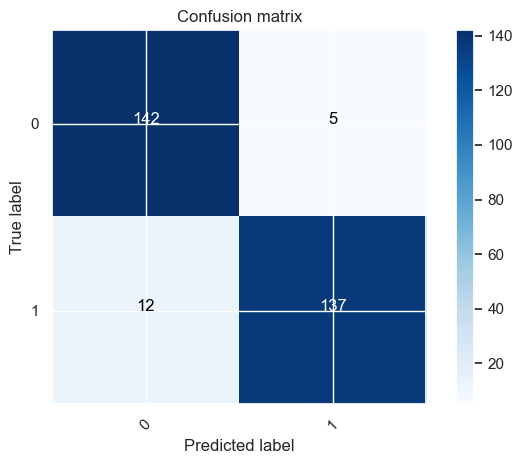

In [23]:
plot_confusion_matrix(cm = cnf_matrix, classes = [0,1],
                          normalize=False,
                          title='Confusion matrix')

In [24]:
# 使用原始数据集进行测试
Lr = LogisticRegression(C = best_c,penalty = 'l1',solver='liblinear')
Lr.fit(X_train_undersample,y_train_undersample)
y_pred = Lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test.values,y_pred)
np.set_printoptions(precision=2)
print('召回率: ',cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))

召回率:  0.9251700680272109


/Users/fangcheng/anc/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[81661  3635]
 [   11   136]]


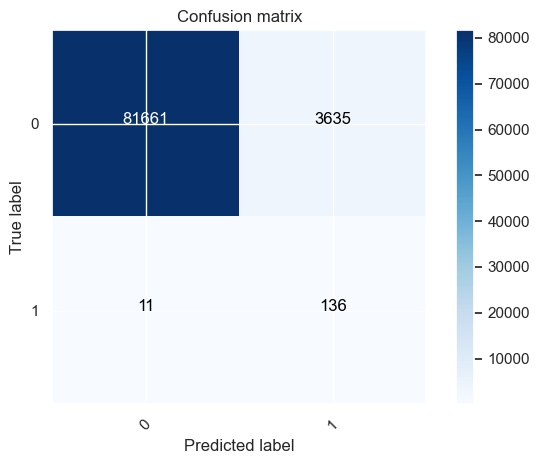

In [26]:
plot_confusion_matrix(cm = cnf_matrix, classes = [0,1],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### 用原始数据来验证Lr模型，有7014个样本被误杀，有12个样本被漏检，误杀率非常的高。所以该模型并不是一个特别好的模型。

/Users/fangcheng/anc/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset: 1.0
Confusion matrix, without normalization
[[ 27 120]
 [  0 149]]
Recall metric in the testing dataset: 0.9865771812080537
Confusion matrix, without normalization
[[ 75  72]
 [  2 147]]
Recall metric in the testing dataset: 0.9395973154362416
Confusion matrix, without normalization
[[109  38]
 [  9 140]]
Recall metric in the testing dataset: 0.8926174496644296
Confusion matrix, without normalization
[[137  10]
 [ 16 133]]
Recall metric in the testing dataset: 0.8456375838926175
Confusion matrix, without normalization
[[143   4]
 [ 23 126]]
Recall metric in the testing dataset: 0.8120805369127517
Confusion matrix, without normalization
[[146   1]
 [ 28 121]]
Recall metric in the testing dataset: 0.7583892617449665
Confusion matrix, without normalization
[[146   1]
 [ 36 113]]
Recall metric in the testing dataset: 0.7046979865771812
Confusion matrix, without normalization
[[146   1]
 [ 44 105]]
Recall metric in the testing dataset: 0.550335570469798

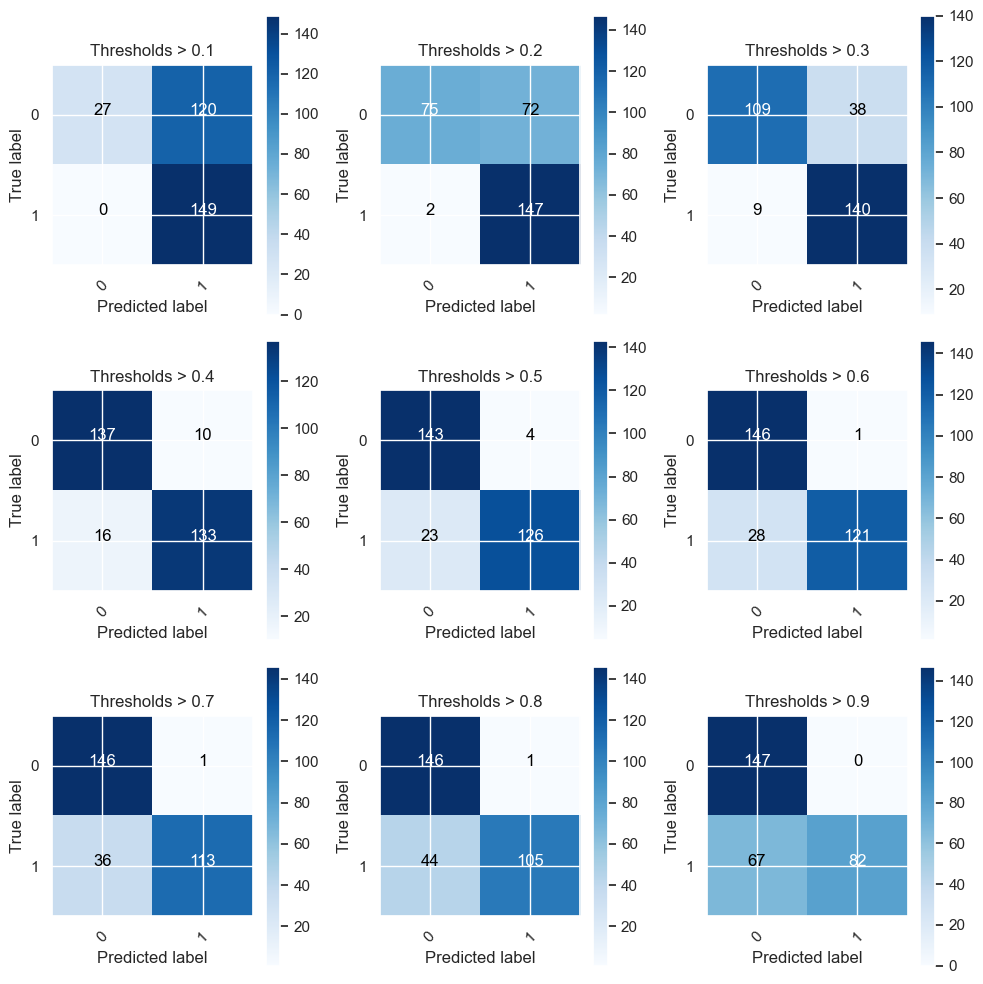

In [27]:
Lr = LogisticRegression(C = 0.01,penalty = 'l1',solver='liblinear')
Lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = Lr.predict_proba(X_test_undersample.values)

#指定阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize = (10,10))
j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print('Recall metric in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    class_names = [0,1]
    plot_confusion_matrix(cm = cnf_matrix, classes = [0,1],
                          normalize=False,
                          title='Thresholds > %s'% i,
                          cmap=plt.cm.Blues)

### 过采样方案

In [28]:
#将原始数据划分为feature和label

features_train,features_test,labels_train,labels_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [32]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state = 0)
os_features,os_labels = oversampler.fit_sample(features_train,labels_train)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/fangcheng/anc/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
len(os_labels[os_labels == 1])

In [ ]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

In [ ]:
best_c = 10

In [ ]:
Lr = LogisticRegression(C = best_c,penalty = 'l1',solver='liblinear')
Lr.fit(features_train,labels_train)
y_pred = Lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test.values,y_pred)
np.set_printoptions(precision=2)
print('召回率: ',cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))

In [ ]:
plot_confusion_matrix(cm = cnf_matrix, classes = [0,1],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## 项目总结
（1）拿到一份数据集的时候，第一步先观察数据集，使用pandas.info(),pandas.descirbe()观察函数。对于二分类问题，观察样本的分布，是否均衡。

（2）根据观察到的结果，对数据进行预处理，包括缺失值，重复值，异常值和错误值的处理，类型转换，数据标准化处理，特征提取（特征工程）。

（3）确定模型的评估标准，accuracy,precision,recall,roc_auc等。

（4）数据预处理完成后，对数据进行切分，training_set,validatin_set,testing_set。

（5）建立基本模型。

（6）模型优化工作，包括参数的优化和特征的优化。

（7）确定最终模型，与实际工作进行组合。